In [1]:
import rlssm
import pandas as pd
import os

#### Import the grouped data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1,1,61,52,4,3,1,1.285418,0
1,10,1,2,54,37,4,2,1,1.577622,0
2,10,1,3,51,51,4,3,2,1.564731,0
3,10,1,4,50,35,3,1,2,1.217245,1
4,10,1,5,59,50,4,2,3,1.929781,0


#### Initialise the model

In [3]:
model = rlssm.RLDDModel(hierarchical_levels=1, threshold_modulation=True)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLDDM', 'RLDDM_thrmod', 1)

### Fit

In [5]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 1

# learning parameters
K = 4 # n options
initial_value_learning = 27.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      alpha_priors=alpha_priors,
                      drift_scaling_priors=drift_scaling_priors,
                      threshold_priors=threshold_priors,
                      ndt_priors=ndt_priors,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 1, 'sd': 50}
threshold_priors {'mu': 1, 'sd': 5}
threshold_modulation_priors {'mu': 0, 'sd': 10}
ndt_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,1678.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [8]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.0,lp__
alpha,1.0,alpha
drift_scaling,1.0,drift_scaling
threshold,1.0,threshold
threshold_modulation,1.0,threshold_modulation


#### get wAIC

In [9]:
model_fit.waic

{'lppd': -222.09311472059403,
 'p_waic': 5.931205675376551,
 'waic': 456.0486407919412,
 'waic_se': 28.311065921303328}

### Posteriors

In [10]:
model_fit.samples

,transf_alpha,transf_drift_scaling,transf_threshold,transf_threshold_modulation,transf_ndt
0,0.000440,8.514610,0.000241,0.356542,0.815738
1,0.000322,8.517830,0.000224,0.358450,0.816826
2,0.000907,4.761900,0.000922,0.304847,0.795083
3,0.000284,11.247700,0.054464,0.165824,0.793329
4,0.000352,11.530600,0.004548,0.255648,0.807082
...,...,...,...,...,...
995,0.099748,0.098563,2.338220,-0.012087,0.799556
996,0.032638,0.199914,1.928350,0.000435,0.792321
997,0.016352,0.278723,1.846390,0.000022,0.796219
998,0.327671,0.091755,2.526070,-0.015842,0.803403


In [11]:
model_fit.trial_samples

{'drift_t': array([[0.       , 0.125425 , 0.132858 , ..., 2.15521  , 0.557427 ,
         0.560926 ],
        [0.       , 0.0918828, 0.0973388, ..., 1.58348  , 0.409172 ,
         0.411783 ],
        [0.       , 0.144693 , 0.1532   , ..., 2.45775  , 0.637995 ,
         0.641736 ],
        ...,
        [0.       , 0.15268  , 0.159299 , ..., 1.87     , 0.525587 ,
         0.52155  ],
        [0.       , 1.00719  , 0.737293 , ..., 1.57963  , 0.531508 ,
         0.387414 ],
        [0.       , 0.889598 , 0.649846 , ..., 1.39076  , 0.467736 ,
         0.340309 ]]),
 'threshold_t': array([[1.68047, 1.68261, 1.68586, ..., 1.9542 , 1.90815, 1.90965],
        [1.66292, 1.66449, 1.66688, ..., 1.86368, 1.8302 , 1.83131],
        [1.61608, 1.61979, 1.62545, ..., 2.08876, 2.00677, 2.00928],
        ...,
        [1.84689, 1.84689, 1.8469 , ..., 1.84718, 1.8471 , 1.8471 ],
        [2.13314, 2.0569 , 1.96691, ..., 1.86628, 1.98374, 1.97843],
        [2.19801, 2.12937, 2.04831, ..., 1.95828, 2.064  , 2.

In [12]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

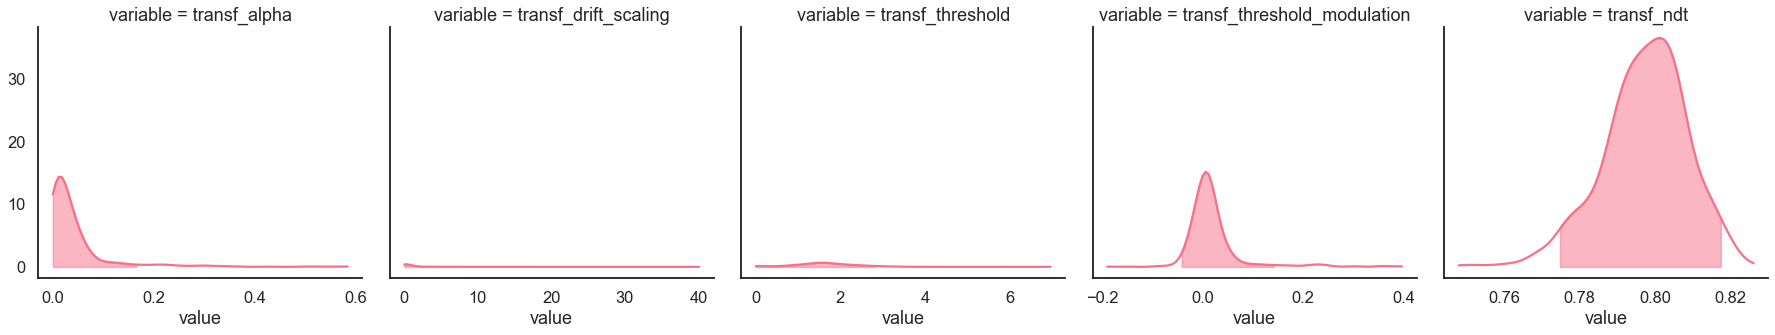

In [13]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

#### Ungrouped

In [14]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.059738  2.528738  1.105738  0.980738  1.171738  1.104738   
2         1.646826  1.169826  2.071826  1.477826  1.437826  1.839826   
3         1.120083  0.970083  1.606083  1.398083  1.175083  0.919083   
4         1.653329  1.334329  0.974329  1.323329  2.802329  1.853329   
5         0.986082  1.191082  1.718082  1.021082  1.978082  3.954082   
...            ...       ...       ...       ...       ...       ...   
96        1.606791  1.018791  0.953791  1.058791  1.442791  1.556791   
97        2.195878  1.883878  1.207878  1.594878  1.159878  1.735878   
98        1.573003  1.995003  1.224003  1.096003  1.485003  1.299003   
99        3.054420  2.821420  0.877420  1.390420  2.165420  1.148420   
100       2.032435  2.386435  1.940435  1.099435  1.082435  1.635435   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.272738  1.782738  1.470738  3.498738  ...      1.0  1.0  1.0  1.0   
2         2.133826  1.101826  1.726826  1.328826  ...      1.0  1.0  1.0  1.0   
3         0.892083  1.168083  0.978083  1.964083  ...      1.0  1.0  1.0  1.0   
4         1.426329  1.482329  2.184329  0.881329  ...      1.0  1.0  1.0  1.0   
5         1.529082  1.496082  2.363082  1.416082  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.195791  1.429791  2.474791  3.858791  ...      1.0  1.0  1.0  1.0   
97        2.077878  1.291878  1.614878  1.175878  ...      1.0  1.0  1.0  1.0   
98        1.059003  1.434003  1.942003  1.099003  ...      1.0  1.0  1.0  1.0   
99        1.724420  1.754420  3.027420  1.643420  ...      1.0  1.0  1.0  1.0   
100       1.250435  1.421435  1.223435  1.286435  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  0.0  
2         1.0  1.0  1.0  1.0  0.0  0.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  0.0  1.0  1.0  0.0  1.0  
5         1.0  0.0  1.0  1.0  1.0  0.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  0.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  0.0  1.0  
99        1.0  0.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  0.0  

[100 rows x 478 columns]

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.723849,1.599370,1.472170,1.038238,1.258738,1.394738,1.756738,2.530738,1.054938,1.189338,1.418738,1.682738,2.381738
2,0.690377,1.501939,1.417658,1.022626,1.196626,1.367326,1.696826,2.196926,1.015026,1.178226,1.375826,1.595226,2.117226
3,0.736402,1.521217,2.027676,1.025483,1.152483,1.383083,1.777083,2.494883,1.027083,1.172583,1.309083,1.540083,2.286083
4,0.702929,1.647530,2.188820,1.040329,1.203329,1.354329,1.825329,2.587329,0.992729,1.144229,1.382829,1.781929,2.652029
5,0.753138,1.596057,2.240408,1.062682,1.223882,1.413082,1.612282,2.404282,0.997682,1.161582,1.403582,1.658882,2.298082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.748954,1.636239,1.657219,1.078791,1.215991,1.387291,1.711191,2.661491,0.997391,1.239991,1.451791,1.777991,2.432591
97,0.765690,1.581811,2.164432,1.030878,1.176378,1.398878,1.769878,2.549878,0.995878,1.160478,1.336878,1.673478,2.355478
98,0.757322,1.631589,3.360879,1.152403,1.391603,1.630003,2.096103,2.641303,1.032003,1.192003,1.349003,1.590003,2.205003


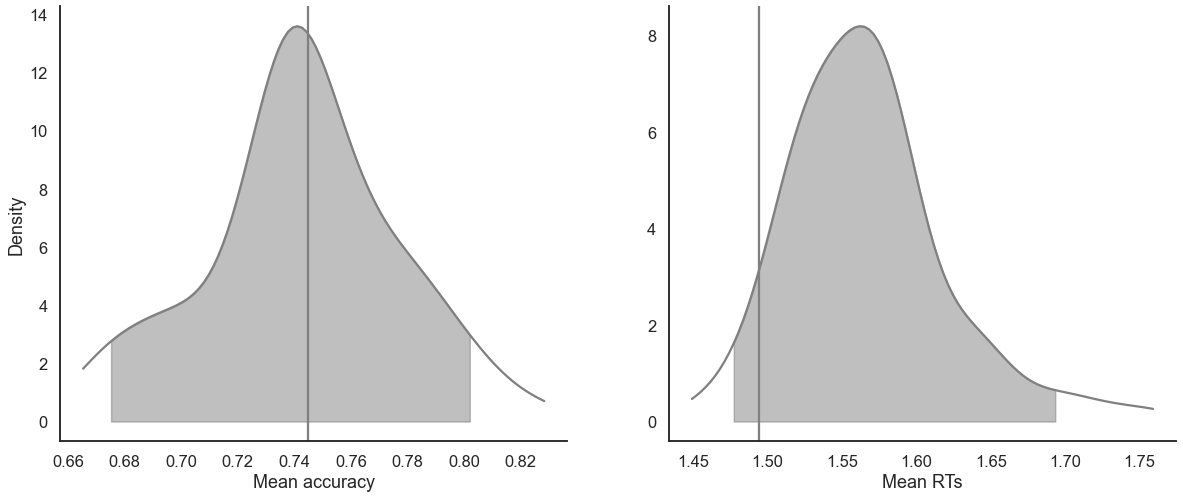

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

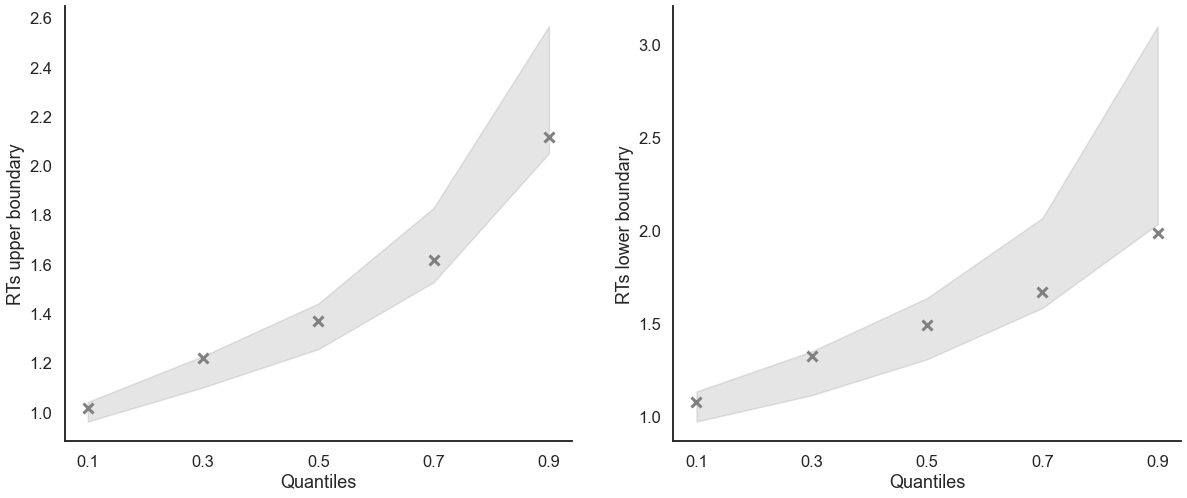

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

#### Grouped

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,choice_pair,block_bins
0,0,10,1,1,61,52,4,3,1,1.285418,0,-1,CD,1
1,1,10,1,2,54,37,4,2,1,1.577622,0,-1,BD,1
2,2,10,1,3,51,51,4,3,2,1.564731,0,-1,CD,1
3,3,10,1,4,50,35,3,1,2,1.217245,1,1,AC,1
4,4,10,1,5,59,50,4,2,3,1.929781,0,-1,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'choice_pair'],
                                                    quantiles=[.3, .5, .7],
                                                    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.70  1.402438  0.965356   
                        2                0.65  1.510726  1.825150   
                        3                0.60  1.435133  0.918710   
                        4                0.65  1.542129  1.990681   
                        5                0.70  1.945782  0.438804   
...                                       ...       ...       ...   
3           CD          96               0.65  1.618041  1.385409   
                        97               0.80  1.593778  1.453897   
                        98               0.75  1.667603  1.186009   
                        99               0.65  1.771620  2.436835   
                        100              0.55  1.906585  2.122759   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.006738        1.189538   
                        2              1.084426        1.131626   
                        3              1.013783        1.285583   
                        4              1.292729        1.178929   
                        5              1.568582        1.788082   
...                                         ...             ...   
3           CD          96             1.558391        1.242791   
                        97             1.236278        1.154378   
                        98             1.420003        1.353403   
                        99             1.392820        1.473420   
                        100            1.346835        1.574435   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.202238        1.314238   
                        2              1.417826        1.281826   
                        3              1.076083        1.503583   
                        4              1.376329        1.407329   
                        5              1.844582        2.082082   
...                                         ...             ...   
3           CD          96             1.904791        1.441791   
                        97             1.287878        1.484878   
                        98             1.500003        1.632003   
                        99             1.912420        1.586420   
                        100            1.610435        1.748435   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.742238        1.493938  
                        2              1.525426        1.526226  
                        3              1.636083        1.622983  
                        4              1.604129        1.483729  
                        5              2.031082        2.143482  
...                                         ...             ...  
3           CD          96             1.931591        1.652191  
                        97             1.359478        1.689878  
                        98             1.640803        1.985203  
                        99             2.040620        1.785820  
                        100            1.972835        1.981435  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_bins'],
                                                    quantiles=[.3, .5, .7],
                                                    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.500000  1.368005  1.823560         1.182538   
           2            0.400000  1.745359  1.358803         1.230926   
           3            0.466667  1.571450  1.326710         1.118083   
           4            0.466667  1.762296  2.440360         1.161329   
           5            0.633333  1.701015  1.053182         1.357082   
...                          ...       ...       ...              ...   
8          96           0.827586  1.500101  2.659968         1.123991   
           97           0.896552  1.324464  1.002227         1.362278   
           98           0.793103  1.333555  1.119151         1.434503   
           99           0.896552  1.603213  1.320608         1.547220   
           100          0.793103  1.474642  1.494218         1.342935   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.041338         1.342738        1.141738   
           2             1.259526         1.574826        1.464326   
           3             1.261883         1.306083        1.335583   
           4             1.219029         1.278829        1.581829   
           5             1.232482         1.374082        1.521082   
...                           ...              ...             ...   
8          96            1.146191         1.168791        1.269291   
           97            1.116378         1.605878        1.192878   
           98            1.079403         1.638003        1.116003   
           99            1.227420         1.568420        1.406420   
           100           1.211035         1.483935        1.344435   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.463538        1.339138  
           2              2.011426        1.925926  
           3              1.952583        1.615583  
           4              1.701829        1.895029  
           5              1.491082        2.040482  
...                            ...             ...  
8          96             2.271991        1.473991  
           97             1.695878        1.365378  
           98             1.765503        1.334803  
           99             1.800020        1.644420  
           100            1.570435        1.572835  

[800 rows x 9 columns]

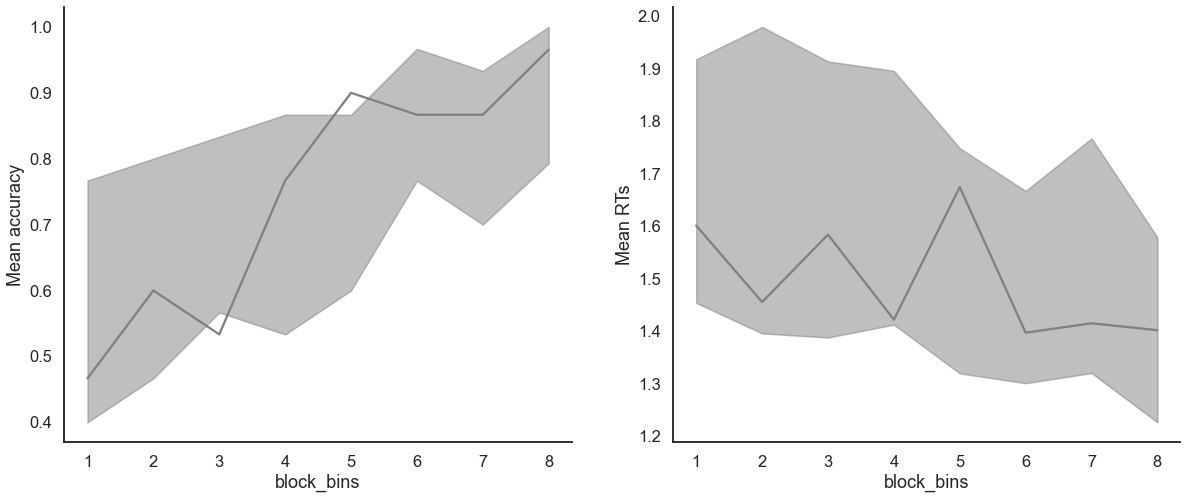

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

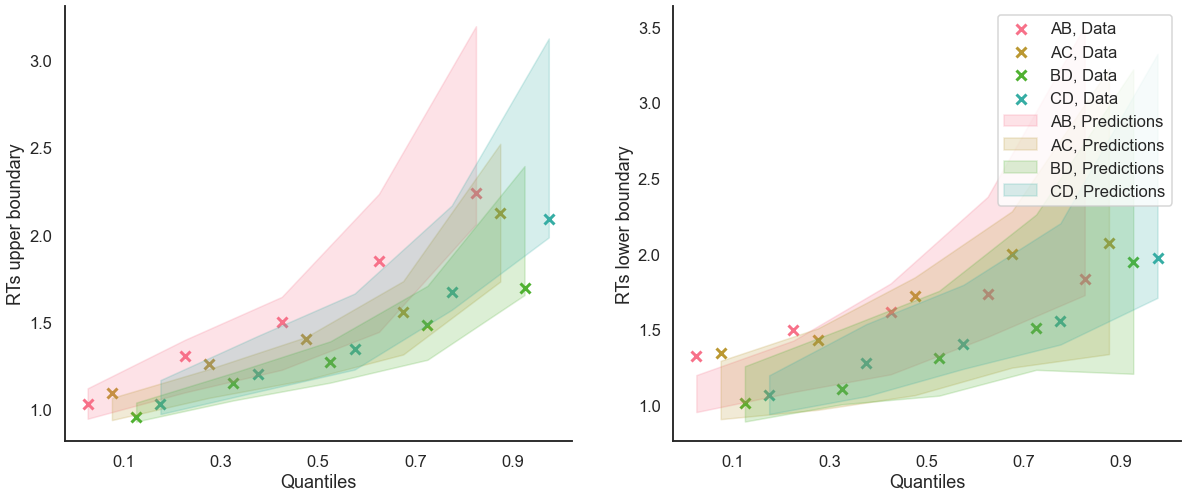

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                       grouping_var='choice_pair',
                                                       kind='shades',
                                                       quantiles=[.1, .3, .5, .7, .9]);

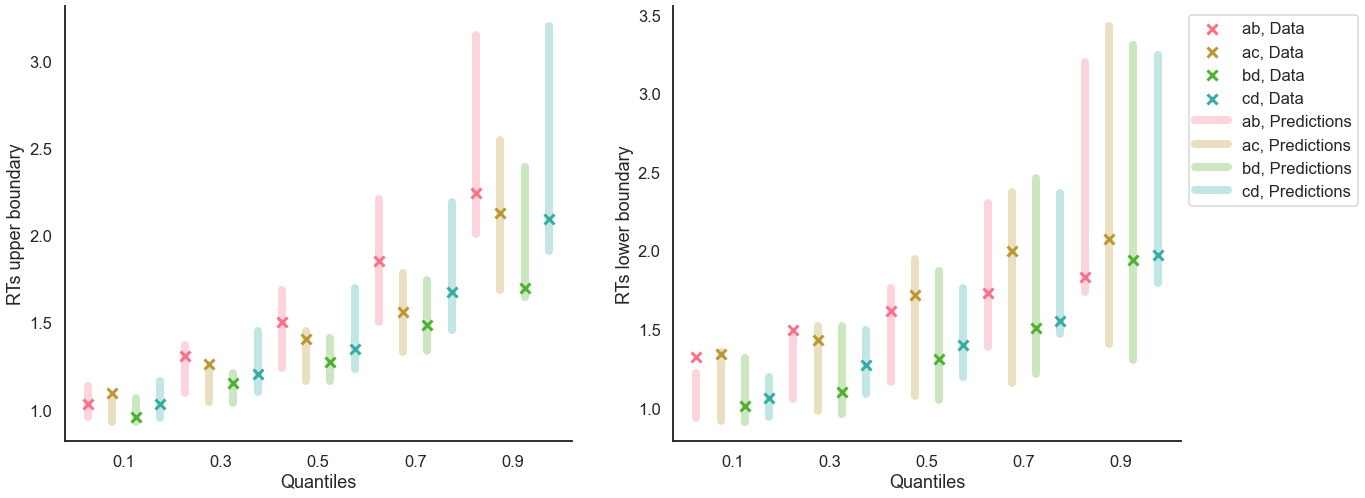

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=300,
                                                       grouping_var='choice_pair',
                                                       palette = sns.color_palette('husl'),
                                                       intervals_kws={'alpha': .3, 'lw':8},
                                                       hue_order=['AB', 'AC', 'BD', 'CD'],
                                                       hue_labels=['ab', 'ac', 'bd', 'cd']);